# Project: Investigate the No Show Appointments Dataset 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

**Throughout the notebook we will be exploring and analysing the "no show appointment" Dataset.
    We will try to find patterns, reasons, ralations or correlations between the provided data features and the final 
    result (show or no-show).**
    
    
**We will be commited to some steps in order to finish our analysis.
    first we will be checking the data and fixing the troubles that comes with it and that would be our first step
    which is data wrangling.
    second we will be trying to study the relations between the features and the final result using interpretable and
    insightful graphs and by calculating some ratios. hopfully by doing that we will find some intersting result and 
    that's the second step which is exploratory data analysis.
    Finally we will try to use these relations in order to reach a final conclusion and a realization of the 
    limitations of these relations that we have and that's the final step "conclusion"**
    

In [1]:
#loading the libraries that we will use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



<a id='wrangling'></a>
## Data Wrangling


### Main steps

<ul>
<li>loading the data</li>
<li>figuring out the number of rows and columns</li>
<li>renaming the columns</li>
<li>looking for the missing values</li>
<li>looking for the duplicated rows</li>
<li>fixing the data types of the columns</li>
<li>droping the unnecessary columns</li>
</ul>

In [2]:
#loading the data
nsa = pd.read_csv('NSA.csv')

In [3]:
nsa.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
# number of rows and columns
nsa.shape

(110527, 14)

In [5]:
#renaming the columns to be more accessible
nsa = nsa.rename(columns = lambda x : x.strip().lower() )

In [6]:
#looking for any missing values
nsa.info()
#good, it seems like there're no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
patientid         110527 non-null float64
appointmentid     110527 non-null int64
gender            110527 non-null object
scheduledday      110527 non-null object
appointmentday    110527 non-null object
age               110527 non-null int64
neighbourhood     110527 non-null object
scholarship       110527 non-null int64
hipertension      110527 non-null int64
diabetes          110527 non-null int64
alcoholism        110527 non-null int64
handcap           110527 non-null int64
sms_received      110527 non-null int64
no-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [7]:
#looking for duplicated rows 
nsa.duplicated().sum()
#good, it seems like there're no duplicated values

0

In [8]:
#exploring the describtion of the columns 
nsa.describe()

,patientid,appointmentid,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


> the age has a minumum of -1 and maximum of 115 which are outliers and can cause problems in the future so we have to drop them

In [9]:
to_be_droped = nsa[nsa['age']<0]['age'].index #the index of the cases that have age smaller than 0
nsa.drop(to_be_droped,inplace = True) #droping these cases

In [10]:
to_be_droped = nsa[nsa['age']>102]['age'].index #the index of the cases that have age more than 102
nsa.drop(to_be_droped,inplace = True) #droping these cases

In [11]:
#droping the unnecessary columns for the analysis
to_be_dropped = ['patientid' , 'appointmentid' , 'appointmentday','scheduledday']
nsa.drop(to_be_dropped , axis = 1 , inplace = True)

<a id='eda'></a>
## Exploratory Data Analysis



### Q1 :What is The percentage of the cases that show up in the appointment ?

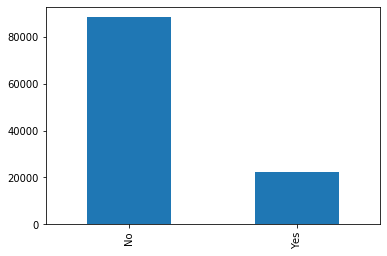

In [12]:
nsa['no-show'].value_counts().plot(kind = 'bar') #bar graph of the people who show and didn't show

In [13]:
# the percentage of shows
nsa['no-show'].value_counts()['Yes'] / nsa.shape[0]

0.2019163778829363

### The answer
>seems like the data is way more skewed to the "no showing" cases than the "showing" cases. only 20% of the cases show up to the appointment

### Q2 : Is there any correlation between the gender of the cases and showing up to the appointment ?

In [14]:
#creating dataframe where we have the numbers of shows and no_shows for females and males
df_gend = nsa.groupby(['gender','no-show']).size().unstack()
df_gend

no-show,No,Yes
gender,,
F,57243,14591
M,30962,7725


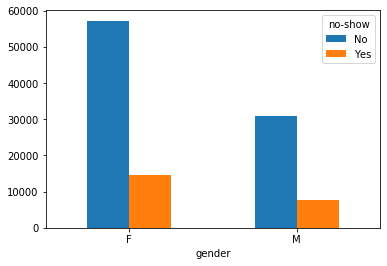

In [15]:
df_gend.plot(kind='bar',rot=0) #a bar graph that shows the numbers of shows an no shows for every gender

In [16]:
gend_sum = df_gend.sum(axis=1) #the total number of females and males
gend_sum

gender
F    71834
M    38687
dtype: int64

In [17]:
#calculatiing the ratio of showing up in both cases of females and males
female_ratio = df_gend['Yes']['F']/gend_sum['F'] #calculating the ratio for the females
male_ratio = df_gend['Yes']['M']/gend_sum['M'] #calculating the ratio for the males
(female_ratio, male_ratio)

(0.2031210847231116, 0.19967947889471915)

### The answer :
> the two ratios are roughly the same as the ratio of the total showing in the data set. so I think there's no relation betrween the gender and showing to the appointment

### Q3 : Is there any correlation between the age of the cases and showing up to the appointment ? 

In [18]:
# the number of unique ages in the dataset
nsa['age'].nunique()

102

In [19]:
#making a function that labels every age to a range so that we will have a 6 ranges of ages instead of 104 different values
def mask (age):
    if age <= 15 :
        return('1-15')  #if the age is between 0 and 15 it will return a string of '1-15'
    if age <= 30 :
        return('15-30') #if the age is between 15 and 30 it will return a string of '15-30'
    if age <= 45 :
        return('30-45') #if the age is between 30 and 45 it will return a string of '30-45'
    if age <= 60 :
        return('45-60') #if the age is between 45 and 60 it will return a string of '45-60'
    if age <= 75 :
        return('60-75') #if the age is between 60 and 75 it will return a string of '60-75'
    
    return('>75')  # if the age is bigger than 75 it will return a string of '>75'

new_nsa = nsa.copy() #making a copy of the nsa dataframe
new_nsa['age'] = new_nsa['age'].apply(mask) #appling the mask function on the age column

In [20]:
new_nsa['age'].unique() #the unique values of the age in the new nsa

array(['60-75', '45-60', '1-15', '>75', '15-30', '30-45'], dtype=object)

In [21]:
# a new data frame which has the shows and no shows for every unique value
df_age = new_nsa.groupby(['age','no-show']).size().unstack() 
df_age

no-show,No,Yes
age,,
1-15,19220,5248
15-30,15921,5242
30-45,17262,4692
45-60,19048,4131
60-75,12234,2136
>75,4520,867


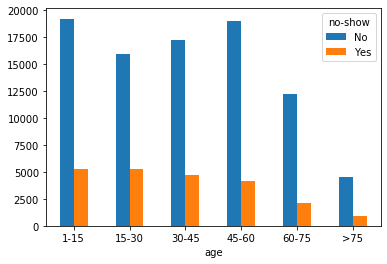

In [22]:
df_age.plot(kind='bar', rot=0) #a bar graph of the shows and no shows for every range of ages

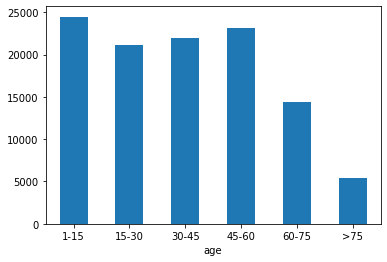

In [23]:
age_sum = df_age.sum(1)
age_sum.plot(kind = 'bar' , rot=0) #a bar graph of the total numbers for every range of ages

In [24]:
#looping over the range of ages and printing the ratio of shows of every range
index = ['1-15', '15-30', '30-45', '45-60', '60-75', '>75'] #the index of the ranges of ages

for i in index:
    ratio = df_age['Yes'][i]/age_sum[i] #calculating the ratio
    print("{} : {}".format(i,ratio)) #printing the ratio

1-15 : 0.21448422429295405
15-30 : 0.24769645135377782
30-45 : 0.21371959551790107
45-60 : 0.1782216661633375
60-75 : 0.14864300626304802
>75 : 0.16094301095229255


### The answer :
> from the graphs above and the ratios printed, it seems that there're some ranges that have higher ratio than the normal or mean ratio and there's another ranges that have lower ratio than the normal.
so maybe there'e some relation between the age and shows or no-shows


### Q4 : Is there any correlation between the neighbourhood of the cases and showing up to the appointment ? 

In [25]:
df_neighb = nsa.groupby(['neighbourhood','no-show']).size().unstack()
df_neighb

no-show,No,Yes
neighbourhood,,
AEROPORTO,7.0,1.0
ANDORINHAS,1740.0,518.0
ANTÔNIO HONÓRIO,221.0,50.0
ARIOVALDO FAVALESSA,220.0,62.0
BARRO VERMELHO,332.0,91.0
...,...,...
SÃO JOSÉ,1548.0,428.0
SÃO PEDRO,1933.0,515.0
TABUAZEIRO,2559.0,573.0


In [26]:
#for simplecity we need to adjust the index of the df_neighb so that it's sorted 
#this would make it easier for us to compare and see the differences clearer
new_ind = df_neighb.sum(1).sort_values(ascending = False).index #the index of sorted values

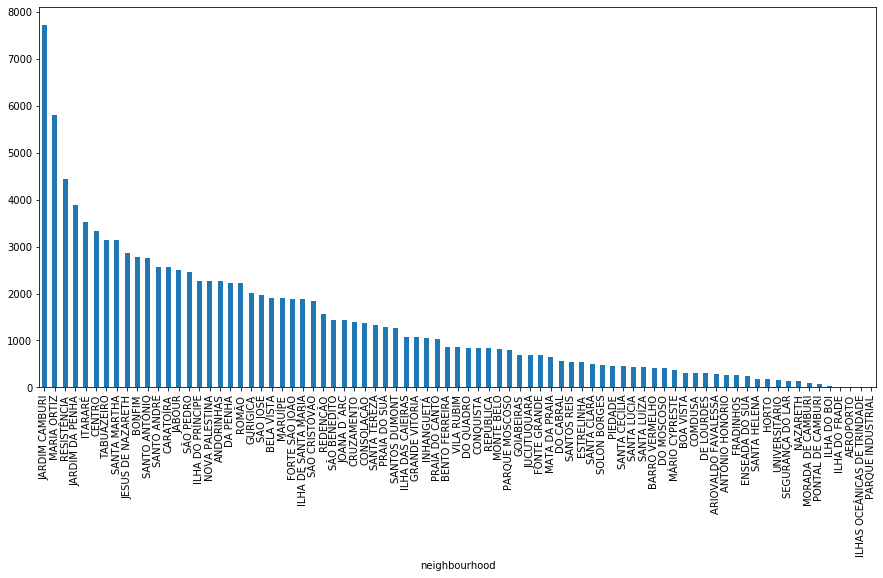

In [27]:
#a bar graph of the total number of cases in each neighbourhood
df_neighb.sum(1)[new_ind].plot(kind = 'bar', figsize = (15,7))

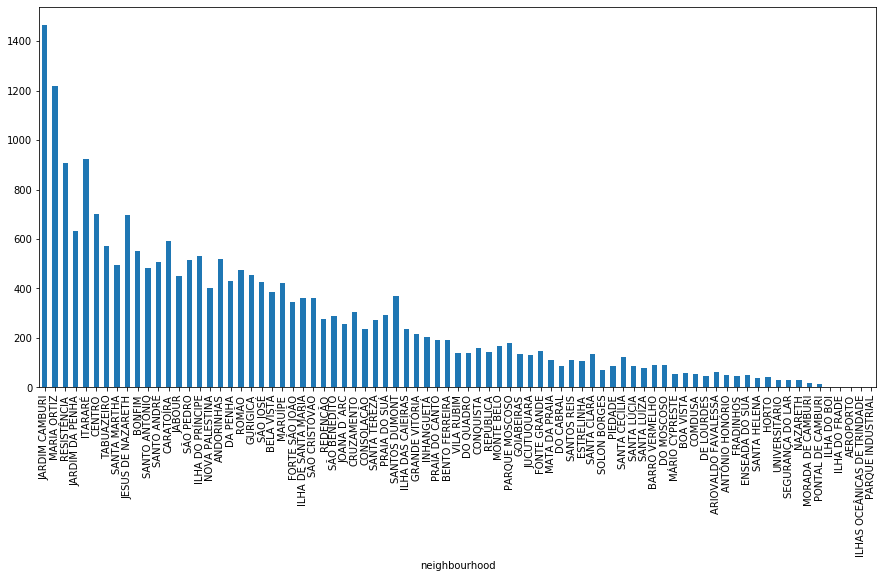

In [28]:
#a bar graph of the numbers of shows in every neighbourhood
df_neighb['Yes'][new_ind].plot(kind='bar',figsize=(15,7))

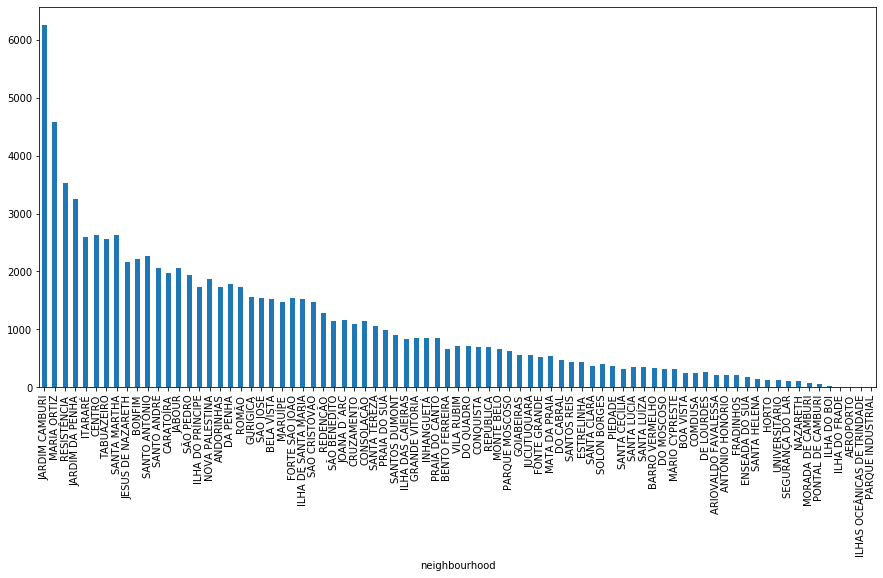

In [29]:
#a bar graph of the numbers of no-shows in every neighbourhood
df_neighb['No'][new_ind].plot(kind='bar',figsize=(15,7))

In [30]:
#looping over the neighbourhoods and printing the ratio of shows of every one of them

for i in new_ind:
    ratio = df_neighb['Yes'][i]/df_neighb.sum(1)[i] #calculating the ratio
    print("{} : {}".format(i,ratio)) #printing the ratio

JARDIM CAMBURI : 0.18984061163664637
MARIA ORTIZ : 0.20999138673557277
RESISTÊNCIA : 0.20446851726472579
JARDIM DA PENHA : 0.16275470724787205
ITARARÉ : 0.2626636311895276
CENTRO : 0.21085782843431314
TABUAZEIRO : 0.18295019157088122
SANTA MARTHA : 0.15841584158415842
JESUS DE NAZARETH : 0.24395373291272346
BONFIM : 0.1983411467724486
SANTO ANTÔNIO : 0.17625637290604515
SANTO ANDRÉ : 0.19758848697005058
CARATOÍRA : 0.2304093567251462
JABOUR : 0.17975288959744917
SÃO PEDRO : 0.21037581699346405
ILHA DO PRÍNCIPE : 0.23477493380406
NOVA PALESTINA : 0.1775618374558304
ANDORINHAS : 0.22940655447298494
DA PENHA : 0.19350473612990526
ROMÃO : 0.2140921409214092
GURIGICA : 0.2259663032705649
SÃO JOSÉ : 0.2165991902834008
BELA VISTA : 0.20136339800734138
MARUÍPE : 0.22292323869610936
FORTE SÃO JOÃO : 0.18316569613552144
ILHA DE SANTA MARIA : 0.19151193633952254
SÃO CRISTÓVÃO : 0.1977124183006536
REDENÇÃO : 0.17707662588538314
SÃO BENEDITO : 0.19944405837387075
JOANA D´ARC : 0.1807988787666433
CR

### The answer :
> there are some high changes in certain neighbourhoods and different ratios. so maybe there's some relation between certain neighbourhoods and ratio of shows.

### Q5 : Is there any correlation between the scholarship of the cases and showing up to the appointment ?

In [31]:
#creating dataframe where we have the numbers of shows and no_shows for the scolarships
df_school = nsa.groupby(['scholarship','no-show']).size().unstack()
df_school

no-show,No,Yes
scholarship,,
0,79922,19738
1,8283,2578


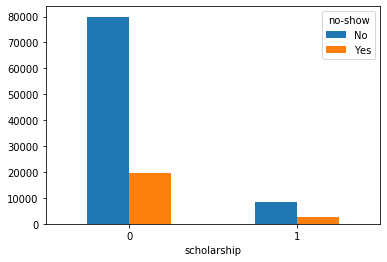

In [32]:
df_school.plot(kind='bar',rot=0) #a bar graph that shows the numbers of shows an no shows for scolars and nonscholars

In [33]:
school_sum = df_school.sum(axis=1) #the total number of scholar and nonscholars
school_sum

scholarship
0    99660
1    10861
dtype: int64

In [34]:
#calculatiing the ratio of showing up in both cases of scholarship
school_ratio = df_school['Yes'][1]/school_sum[1] #calculating the ratio for the scholar
nonschool_ratio = df_school['Yes'][0]/school_sum[0] #calculating the ratio for the nonscholar
(school_ratio, nonschool_ratio)

(0.2373630420771568, 0.19805338149709012)

### The answer :
> the total ratio of showing up in the appointment is 20% but when we see the ratio if the case has a scholarship, we find that the ratio is 23.7% which is a little bit higher. so maybe there's a relation between showing in the appointment and having a scholarship but not a strong relation

### Q6 : Is there any correlation between the hipertension of the cases and showing up to the appointment ?

In [35]:
#creating dataframe where we have the numbers of shows and no_shows for the hipertension
df_hip = nsa.groupby(['hipertension','no-show']).size().unstack()
df_hip

no-show,No,Yes
hipertension,,
0,70177,18544
1,18028,3772


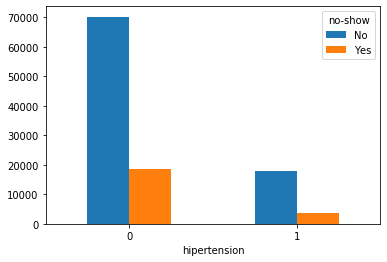

In [36]:
df_hip.plot(kind='bar',rot=0) #a bar graph that shows the numbers of shows an no shows for hipers and nonhipers

In [37]:
hip_sum = df_hip.sum(axis=1) #the total number of hipers and nonhipers
hip_sum

hipertension
0    88721
1    21800
dtype: int64

In [38]:
#calculatiing the ratio of showing up in both cases of hipertension
hip_ratio = df_hip['Yes'][1]/hip_sum[1] #calculating the ratio for the hipers
nonhip_ratio = df_hip['Yes'][0]/hip_sum[0] #calculating the ratio for the nonhipers
(hip_ratio, nonhip_ratio)

(0.1730275229357798, 0.20901477665941548)

### The answer:
> the total ratio of showing up in the appointment is 20% but when we see the ratio if the case has a hipertension, we find that the ratio is 17.3% which is lower but not by much. so maybe there's a relation between showing in the appointment and having a hipertension but not a strong relation

### Q7 : Is there any correlation between the diabetes of the cases and showing up to the appointment ?

In [39]:
#creating dataframe where we have the numbers of shows and no_shows for the diabetes
df_dia = nsa.groupby(['diabetes','no-show']).size().unstack()
df_dia

no-show,No,Yes
diabetes,,
0,81692,20886
1,6513,1430


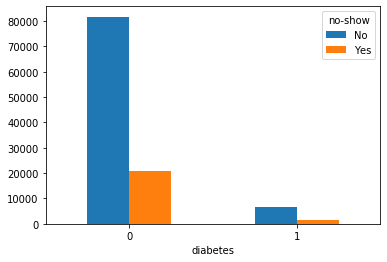

In [40]:
df_dia.plot(kind='bar',rot=0) #a bar graph that shows the numbers of shows an no shows for diabetics and nondiabetics

In [41]:
dia_sum = df_dia.sum(axis=1) #the total number of diabetics and non diabetics
dia_sum

diabetes
0    102578
1      7943
dtype: int64

In [42]:
#calculatiing the ratio of showing up in both cases of diabetes
dia_ratio = df_dia['Yes'][1]/dia_sum[1] #calculating the ratio for the diabetic
nondia_ratio = df_dia['Yes'][0]/dia_sum[0] #calculating the ratio for the nondiabetics
(dia_ratio, nondia_ratio)

(0.18003273322422259, 0.20361091072159723)

### The answer:
> the total ratio of showing up in the appointment is 20% but when we see the ratio if the case is diabetic, we find that the ratio is 18% which is lower but not by much. so maybe there's a relation between showing in the appointment and having a diabetes but not a strong relation

### Q8 : Is there any correlation between the alcoholism of the cases and showing up to the appointment ?

In [43]:
#creating dataframe where we have the numbers of shows and no_shows for the alcoholism
df_alco = nsa.groupby(['alcoholism','no-show']).size().unstack()
df_alco

no-show,No,Yes
alcoholism,,
0,85522,21639
1,2683,677


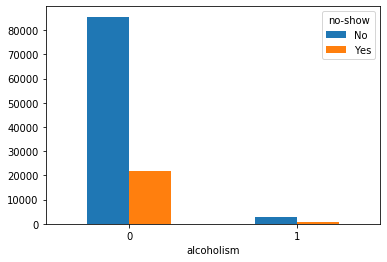

In [44]:
df_alco.plot(kind='bar',rot=0) #bar graph that shows the numbers of shows an no shows for alcoholics and nonalcoholics

In [45]:
alco_sum = df_alco.sum(axis=1) #the total number of alcoholics and nonalcoholics
alco_sum

alcoholism
0    107161
1      3360
dtype: int64

In [46]:
#calculatiing the ratio of showing up in both cases of alcoholism
alco_ratio = df_alco['Yes'][1]/alco_sum[1] #calculating the ratio for the alcoholics
nonalco_ratio = df_alco['Yes'][0]/alco_sum[0] #calculating the ratio for the alcoholicsnon
(alco_ratio, nonalco_ratio)

(0.20148809523809524, 0.20192980655275708)

### The answer :
> the total ratio of showing up in the appointment is 20% which is the same as the ratios above.
So I think there's no relationship between the alcoholism and showing up in the appointment

### Q9 : Is there any correlation between the handicap of the cases and showing up to the appointment ?

In [47]:
nsa['handcap'].unique() #the uniqiue values in handcap

array([0, 1, 2, 3, 4], dtype=int64)

In [48]:
nsa['handcap'].value_counts() #the numbers of every unique value

0    108284
1      2038
2       183
3        13
4         3
Name: handcap, dtype: int64

In [49]:
#we have 5 unique values of handcap but the values 1 to 4 has a few cases number so thier ratios won't be indicative
# so instead of dealing with 5 values, we are going to only deal with two values
# the values 0 and 1 will be the same but the values from 2 to 4 will be 1

#that function applies what we discussed
def mask_hand (case):
    if case ==0 : #if the case is 0 it's going to return 0
        return 0
    return 1 #if the case is 1 , 2 ,3 or 4 it's going to return 1

In [50]:
#we will use our new_nsa to apply our mask_hand function on the cases
new_nsa['handcap'] = new_nsa['handcap'].apply(mask_hand)

In [51]:
#creating dataframe where we have the numbers of shows and no_shows for the handcap
df_hand = new_nsa.groupby(['handcap','no-show']).size().unstack()
df_hand

no-show,No,Yes
handcap,,
0,86372,21912
1,1833,404


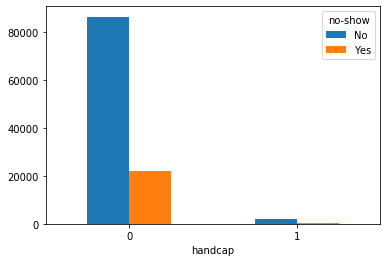

In [52]:
df_hand.plot(kind='bar',rot=0) #a bar graph that shows the numbers of shows an no shows for handicap and non handicap

In [53]:
hand_sum = df_hand.sum(axis=1) #the total number of handcap and nonhandcaps
hand_sum

handcap
0    108284
1      2237
dtype: int64

In [54]:
#calculatiing the ratio of showing up in both cases of handcap
hand_ratio = df_hand['Yes'][1]/hand_sum[1] #calculating the ratio for the handicap
nonhand_ratio = df_hand['Yes'][0]/hand_sum[0] #calculating the ratio for the nonhandicap
(hand_ratio, nonhand_ratio)

(0.18059901654000893, 0.2023567655424624)

### The answer:
> the total ratio of showing up in the appointment is 20% but when we see the ratio if the case is handicap, we find that the ratio is about 18% which is lower but not by much. so maybe there's a relation between showing in the appointment and having a handicap but not a strong relation

### Q10 : Is there any correlation between the sms recieved and showing up to the appointment ?

In [55]:
#creating dataframe where we have the numbers of shows and no_shows for the sms recieved
df_sms = nsa.groupby(['sms_received','no-show']).size().unstack()
df_sms

no-show,No,Yes
sms_received,,
0,62508,12532
1,25697,9784


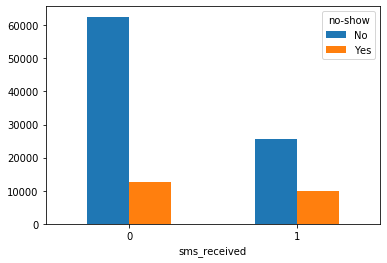

In [56]:
df_sms.plot(kind='bar',rot=0) #a bar graph that shows the numbers of shows an no shows for sms recieved and non sms

In [57]:
sms_sum = df_sms.sum(axis=1) #the total number of sms_recieved and nonsms_recieved
sms_sum

sms_received
0    75040
1    35481
dtype: int64

In [58]:
#calculatiing the ratio of showing up in both cases of sms_recieved
sms_ratio = df_sms['Yes'][1]/sms_sum[1] #calculating the ratio for the sms_recieved
nonsms_ratio = df_sms['Yes'][0]/sms_sum[0] #calculating the ratio for the nonsms_recieved
(sms_ratio, nonsms_ratio)

(0.27575322003325725, 0.1670042643923241)

### The answer:
> the total ratio of showing up in the appointment is 20% but when we see the ratio if the case recieved a sms, we find that the ratio is about 27.5% which is higher than normal and the ratio if the case didn't recieve a sms, we find that the ratio is about 16.7% which is lower than normal. so I think there's a relation between showing in the appointment and recieving an sms.

<a id='conclusions'></a>
## Conclusions

### First conclusion :

**The data that we are working with isn't balanced and highly skewed that only 20% of the data is shows and the rest
are no shows which is a big problem and a limitation**

### Second conclusion :

#### there are some features that have intersting relations with showing in the appointment like : 

**from our analysis of the data we found some intersting result.
there're some features that have some relation with the shows like scholarship , hipertension, diabetes , handcap ,sms_recieved , some age ranges and some neighbourhoods but there're some limitations and problems.
for example, the scolarship only has an effect if the case is scholar but if he isn't then we can't tell or the scholar won't have any effect on the inference.
the same goes on hipertension, diabetes, handcap and many neighbourhoods and ranges of ages.
an even if the case is scholar or hipertension there's big uncertainity because the effect on the ratio is about 3 percent higher or lower so there's high uncertainity.
the sms_recieved showd some intersting result: if the case recieved then there's 27% they would show and if the case didn't recieve , they would have 16% of showing so there's a nice relationship but still it has high uncertainity.**

### Third conclusion :

**all the features are binary or catagorical and there're no continious feature that have any decent relation with the data which makes the inference is harder as he have few number of options to build out inference upon**